In [5]:
import ccxt
import pandas as pd
import sys
from pprint import pprint
# import logging
# logging.basicConfig(level=logging.DEBUG)

print('python', sys.version)
print('CCXT Version:', ccxt.__version__)

exchange = ccxt.kucoinfutures({
    'adjustForTimeDifference': True,
})
# exchange.verbose = True

securities = pd.DataFrame(exchange.load_markets()).transpose()
pprint(securities)

python 3.10.11 (main, Apr 20 2023, 19:02:41) [GCC 11.2.0]
CCXT Version: 3.0.101
                          id              symbol base quote baseId quoteId   
BTC/USDT:USDT       XBTUSDTM       BTC/USDT:USDT  BTC  USDT    XBT    USDT  \
BTC/USD:BTC          XBTUSDM         BTC/USD:BTC  BTC   USD    XBT     USD   
ETH/USDT:USDT       ETHUSDTM       ETH/USDT:USDT  ETH  USDT    ETH    USDT   
BCH/USDT:USDT       BCHUSDTM       BCH/USDT:USDT  BCH  USDT    BCH    USDT   
BSV/USDT:USDT       BSVUSDTM       BSV/USDT:USDT  BSV  USDT    BSV    USDT   
...                      ...                 ...  ...   ...    ...     ...   
MAV/USDT:USDT       MAVUSDTM       MAV/USDT:USDT  MAV  USDT    MAV    USDT   
MDT/USDT:USDT       MDTUSDTM       MDT/USDT:USDT  MDT  USDT    MDT    USDT   
XEC/USDT:USDT       XECUSDTM       XEC/USDT:USDT  XEC  USDT    XEC    USDT   
XVG/USDT:USDT       XVGUSDTM       XVG/USDT:USDT  XVG  USDT    XVG    USDT   
BTC/USD:BTC-230929   XBTMU23  BTC/USD:BTC-230929  BTC   USD   

In [6]:
securities.quote.unique()

array(['USDT', 'USD', 'USDC'], dtype=object)

#### Constants

In [7]:
quote = 'USDT'
time_frame = '1d'
data_folder = '../freq-user-data/data/kucoin'

#### Get pairs from exchange API

In [8]:
df_pairs = securities[['base', 'quote']]
df_pairs = df_pairs[df_pairs.quote.isin(['USDT'])]
" ".join(df_pairs.base + '/' + df_pairs.quote)
# pairs = df.head
df_pairs
coins = df_pairs.base.values[:20].tolist()
coins


['BTC',
 'ETH',
 'BCH',
 'BSV',
 'LINK',
 'UNI',
 'YFI',
 'EOS',
 'DOT',
 'FIL',
 'ADA',
 'XRP',
 'LTC',
 'TRX',
 'GRT',
 'SUSHI',
 'XLM',
 '1INCH',
 'ZEC',
 'DASH']

In [662]:

data_files = [
    (f'{base}_{quote}-{time_frame}-futures.json', base, quote)
    for [base,quote] in pairs
]


#### Get pairs/coins from filenames in the data folder

In [9]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from pklib import load_close_prices

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [271]:


exchange = 'kucoin'
quote = 'USDT'
time_frame = '1h'
dt_format = '%Y-%m-%d' #'%d.%m.%Y %H:%M:%S,%f'
start_dt = datetime.strptime('2023-01-01', dt_format)
end_dt = datetime.strptime('2023-07-01', dt_format)
start_ts = start_dt.timestamp() * 1000
end_ts = end_dt.timestamp() * 1000


### Get coins from data folder
# pairs = [
#     f.replace(data_folder + '/','').split('-')[0].split('_')
#     for f in 
#     glob.glob(f"{glob.escape(data_folder)}/*_{quote}-{time_frame}.json")
# ]
# coins = [p[0] for p in pairs if p[0] not in ['USDC', 'BUSD', 'USDT']]
###

### Get coins from exchange
coins = df_pairs.base.values[:20].tolist()
###


df = load_close_prices(exchange, coins, quote, time_frame, start_ts, end_ts)

### Filter out coins with less than 1000 rows
# non_null_values = df.count()
# coins = non_null_values[non_null_values > 1000].index.values.tolist()
# df = df[coins]
###


### further filter so all selected have value over the period
# c = df.count()
# coins = c[c == c.max()].index.tolist()
# df = df[coins]
###

df

,BTC,ETH,BCH,BSV,LINK,UNI,YFI,EOS,DOT,FIL,ADA,XRP,LTC,TRX,GRT,SUSHI,XLM,1INCH,ZEC,DASH
dt,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,16532.5,1194.10,96.40,41.499,5.5274,5.1513,5047.91,0.8605,4.2870,2.9987,0.244587,0.33854,69.317,0.054548,0.05540,0.9215,0.070758,0.38102,37.263,41.63
2023-01-01 01:00:00,16553.4,1196.01,96.57,41.426,5.5564,5.1376,5051.85,0.8609,4.2996,3.0291,0.245312,0.33887,69.507,0.054752,0.05547,0.9225,0.071002,0.38315,37.141,41.76
2023-01-01 02:00:00,16544.9,1195.45,96.58,41.399,5.5459,5.1342,5084.78,0.8614,4.2985,3.0188,0.245712,0.33806,69.532,0.054761,0.05595,0.9223,0.071046,0.38389,37.342,41.74
2023-01-01 03:00:00,16535.7,1194.07,96.62,41.267,5.5527,5.1183,5095.70,0.8608,4.3027,3.0138,0.245359,0.33826,69.503,0.054760,0.05579,0.9241,0.070955,0.38295,37.197,41.64
2023-01-01 04:00:00,16520.1,1192.97,96.19,41.508,5.5148,5.0965,5073.74,0.8579,4.2848,3.0150,0.244448,0.33606,69.297,0.054655,0.05571,0.9219,0.070856,0.38215,36.943,41.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-30 19:00:00,30373.7,1926.53,302.34,41.851,6.3152,5.2598,6613.95,0.7450,5.1317,3.9295,0.285598,0.47748,105.418,0.075987,0.10467,0.6805,0.112400,0.31455,33.225,37.64
2023-06-30 20:00:00,30399.4,1927.51,300.38,41.799,6.2829,5.2929,6613.56,0.7435,5.1276,3.9179,0.286539,0.47623,107.304,0.076048,0.10427,0.6791,0.111064,0.31423,32.806,37.58
2023-06-30 21:00:00,30480.5,1931.91,309.13,42.491,6.3011,5.3309,6631.11,0.7465,5.1615,3.9388,0.287679,0.47619,107.196,0.076312,0.10544,0.6853,0.111262,0.31633,33.183,37.68


#### Create dataframes for log returns, log prices, cumulative log returns, returns

In [272]:
## logs, lrets, cumlrets

df_rets = df.apply(lambda x: x.pct_change()).dropna()
df_lrets = df.apply(lambda x: x.divide(x.shift()).apply(np.log)).dropna()
df_cumlrets = df_lrets.apply(lambda x: x.cumsum())
df_logs = df.apply(np.log)

#### Perform Hierarchical Clustering

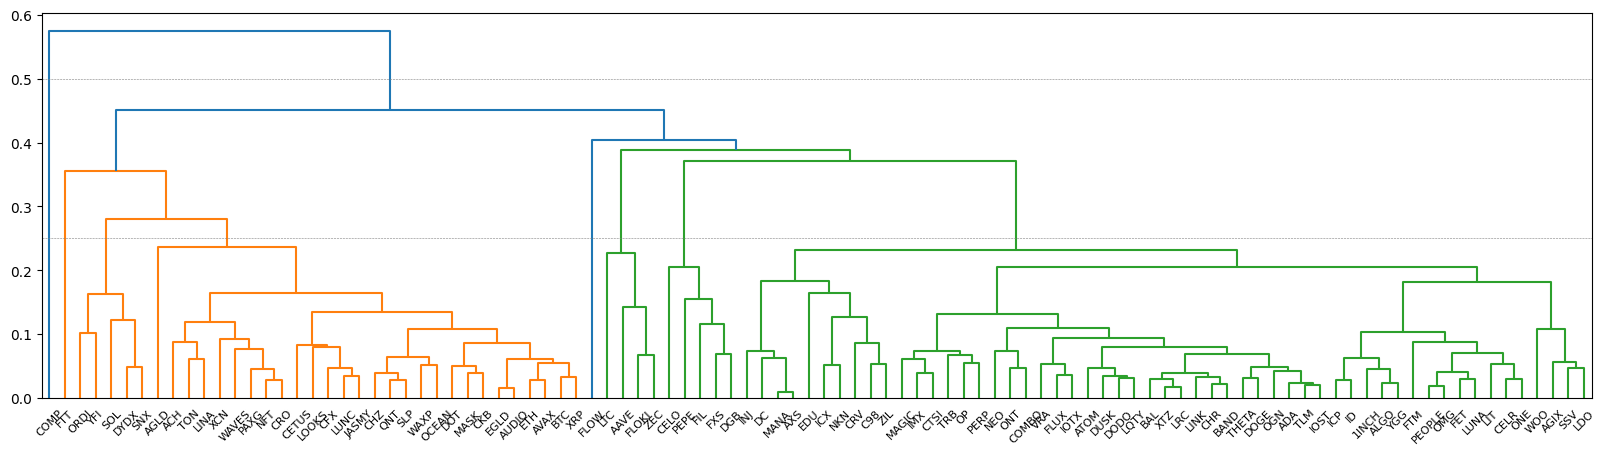

In [847]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

from scipy.spatial.distance import squareform, pdist
import scipy.cluster.hierarchy as hcl

# <!-- data = list(zip(x, y)) -->
data = df_rets[df_rets.columns[:100]]

linkage_data = linkage(data.T.values, method='ward', metric='euclidean')

fig, ax = plt.subplots(1, 1, figsize=(20, 5))

dendrogram(linkage_data, ax=ax, labels=data.columns, leaf_rotation=45., leaf_font_size=8.)
for y in np.arange(0,2,0.25): ax.axhline(y, linestyle='--', lw=0.4, c='gray')
# ax.set_yscale('log')
plt.show()

### Find cointegrated pairs

In [14]:
import seaborn as sns
import statsmodels
from statsmodels.tsa.stattools import coint

In [273]:
df_data = df
# data

In [274]:
from itertools import combinations
 
coin_pairs = list(combinations(coins, 2))
df_cointi = pd.DataFrame(index=pd.MultiIndex.from_tuples(coin_pairs, names=["S1", "S2"]), data=[coint(df_data[S1], df_data[S2]) for (S1,S2) in coin_pairs ])
df_cointi = df_cointi.set_axis(['coin_t', 'pvalue','crit_value'],axis=1)
df_cointi

coin_t    pvalue   
S1    S2                         
BTC   ETH  -2.940887  0.124934  \
      BCH  -2.026650  0.514700   
      BSV  -2.485418  0.285538   
      LINK -1.621532  0.711716   
      UNI  -2.740982  0.185186   
...              ...       ...   
XLM   ZEC  -1.728911  0.663566   
      DASH -1.439084  0.783803   
1INCH ZEC  -1.479782  0.768863   
      DASH -3.211704  0.067992   
ZEC   DASH -1.752288  0.652594   

                                                   crit_value  
S1    S2                                                       
BTC   ETH   [-3.8989635136493104, -3.337537246381268, -3.0...  
      BCH   [-3.8989635136493104, -3.337537246381268, -3.0...  
      BSV   [-3.8989635136493104, -3.337537246381268, -3.0...  
      LINK  [-3.8989635136493104, -3.337537246381268, -3.0...  
      UNI   [-3.8989635136493104, -3.337537246381268, -3.0...  
...                                                       ...  
XLM   ZEC   [-3.8989635136493104, -3.337537246381268, -3.0...  
      DASH  [-3.8989635136493104, -3.337537246381268, -3.0...  
1INCH ZEC   [-3.8989635136493104, -3.337537246381268, -3.0...  
      DASH  [-3.8989635136493104, -3.337537246381268, -3.0...  
ZEC   DASH  [-3.8989635136493104, -3.337537246381268, -3.0...  

[190 rows x 3 columns]

In [275]:
# df_cointi.loc[(df_cointi.pvalue <= 0.1)]
df_cointegged = df_cointi.loc[(df_cointi.pvalue < 0.05)]
co_combs = df_cointegged.index.values.tolist()
df_cointegged

coin_t    pvalue   
S1   S2                          
LINK EOS   -3.565736  0.026996  \
     DOT   -3.752651  0.015657   
     1INCH -4.086742  0.005380   
     DASH  -3.383686  0.044195   
UNI  SUSHI -4.006784  0.007023   
EOS  1INCH -3.343186  0.049064   
DOT  SUSHI -3.340691  0.049378   
     1INCH -4.298013  0.002579   
     DASH  -3.524349  0.030297   
LTC  XLM   -4.158373  0.004214   
TRX  SUSHI -3.389026  0.043584   
     ZEC   -3.454644  0.036634   

                                                   crit_value  
S1   S2                                                        
LINK EOS    [-3.8989635136493104, -3.337537246381268, -3.0...  
     DOT    [-3.8989635136493104, -3.337537246381268, -3.0...  
     1INCH  [-3.8989635136493104, -3.337537246381268, -3.0...  
     DASH   [-3.8989635136493104, -3.337537246381268, -3.0...  
UNI  SUSHI  [-3.8989635136493104, -3.337537246381268, -3.0...  
EOS  1INCH  [-3.8989635136493104, -3.337537246381268, -3.0...  
DOT  SUSHI  [-3.8989635136493104, -3.337537246381268, -3.0...  
     1INCH  [-3.8989635136493104, -3.337537246381268, -3.0...  
     DASH   [-3.8989635136493104, -3.337537246381268, -3.0...  
LTC  XLM    [-3.8989635136493104, -3.337537246381268, -3.0...  
TRX  SUSHI  [-3.8989635136493104, -3.337537246381268, -3.0...  
     ZEC    [-3.8989635136493104, -3.337537246381268, -3.0...

In [276]:

df_coin_t = df_cointegged[['coin_t']].unstack().droplevel(0, axis=1)
df_pvalues = df_cointegged[['pvalue']].unstack().droplevel(0, axis=1)
df_crit_values = df_cointegged[['crit_value']].unstack().droplevel(0, axis=1)
df_pvalues

S2,EOS,DOT,1INCH,DASH,SUSHI,XLM,ZEC
S1,,,,,,,
LINK,0.026996,0.015657,0.005380,0.044195,NaN,NaN,NaN
UNI,NaN,NaN,NaN,NaN,0.007023,NaN,NaN
EOS,NaN,NaN,0.049064,NaN,NaN,NaN,NaN
DOT,NaN,NaN,0.002579,0.030297,0.049378,NaN,NaN
LTC,NaN,NaN,NaN,NaN,NaN,0.004214,NaN
TRX,NaN,NaN,NaN,NaN,0.043584,NaN,0.036634


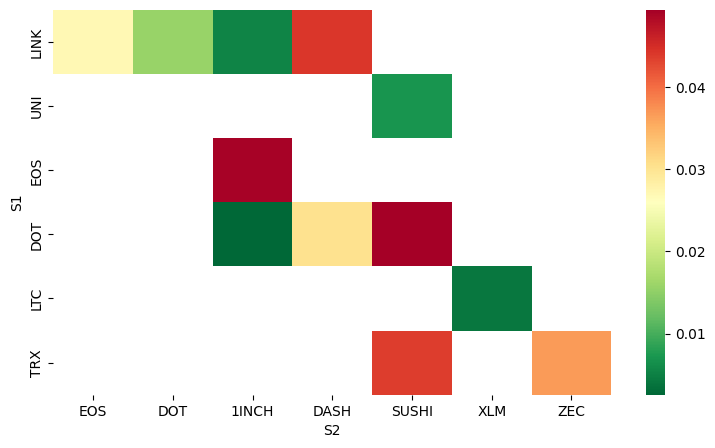

[('LINK', 'EOS') ('LINK', 'DOT') ('LINK', '1INCH') ('LINK', 'DASH')
 ('UNI', 'SUSHI') ('EOS', '1INCH') ('DOT', 'SUSHI') ('DOT', '1INCH')
 ('DOT', 'DASH') ('LTC', 'XLM') ('TRX', 'SUSHI') ('TRX', 'ZEC')]


In [277]:
# pvalues heatmap
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(df_pvalues, ax=ax, cmap='RdYlGn_r')
plt.show()
print(df_cointegged.index.values)

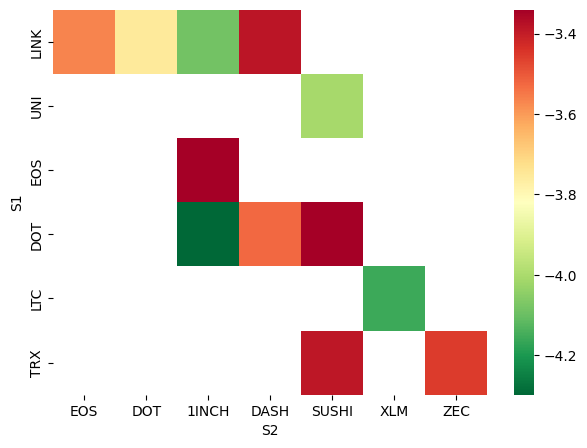

[('LINK', 'EOS') ('LINK', 'DOT') ('LINK', '1INCH') ('LINK', 'DASH')
 ('UNI', 'SUSHI') ('EOS', '1INCH') ('DOT', 'SUSHI') ('DOT', '1INCH')
 ('DOT', 'DASH') ('LTC', 'XLM') ('TRX', 'SUSHI') ('TRX', 'ZEC')]


In [278]:

fig, ax = plt.subplots(figsize=(7,5))
sns.heatmap(df_coin_t, ax=ax, cmap='RdYlGn_r')
plt.show()
print(df_cointegged.index.values)

In [279]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

def add_indicators(wdf,pair):
    p1, p2 = pair

    # S1, S2 = wdf[pair_names].T.values
    # score, pvalue, _ = coint(S1, S2)
    # wdf['rma1'] = wdf.ratio.rolling(rma1).mean()
    # wdf['rma2'] = wdf.ratio.rolling(rma2).mean()
    idf = wdf.copy(
    ).assign(ratio=lambda x: x.iloc[:, 0] / x.iloc[:,1])
    # idf['rma1'] = idf.ratio.ewm(span=rma1).mean()
    # idf['rma2'] = idf.ratio.ewm(span=rma2).mean()
    # idf['rstd2'] = idf.ratio.rolling(rma2).std()
    # idf['zscore'] = idf.rma1.subtract(wdf.rma2).divide(idf.rstd2)
    # idf['sig'] = np.where(wdf.zscore < thre[0], 1, np.where(idf.zscore > thre[1], -1, 0))
    # idf['absZ'] = idf.zscore.abs()
    # idf['zsign'] = idf.zscore.apply(np.sign).fillna(0).astype(int)

    return idf

def trade(wdf, lthre, sl):
 
    pos_size = 100
    fee = 0.001
    pos_index = None
    count_S1, count_S2 = None,None
    pos_lret_S1, pos_lret_S2 = None, None
    for index, row in wdf.iterrows():
        if pos_index is None:
            if abs(row.sig) != 0:
                wdf.at[index,'pos'] = row.sig
                count_S1 = pos_size / row.S1 * row.sig 
                count_S2 = count_S1 * row.ratio * -1
                wdf.at[index,'count_S1'] = count_S1
                wdf.at[index,'count_S2'] = count_S2
                pos_index = index
                pos_lret_S1, pos_lret_S2 = 0,0
        # Clear positions if the z-score between -.5 and .5
        else:
            pos_row = wdf.loc[pos_index]
            pos_lret_S1, pos_lret_S2 = pos_lret_S1 + row.lret_S1 * pos_row.sig, pos_lret_S2 + row.lret_S2 * pos_row.sig * -1
            wdf.at[index,'pos_lret_S1'] = pos_lret_S1
            wdf.at[index,'pos_lret_S2'] = pos_lret_S2
            # pnl_S1 = (row['S1'] - start_row['S1'])*count_S1
            # pnl_S2 = (row['S2'] - start_row['S2'])*count_S2
            # wdf.at[index,'pos_pnl_S1'] = pnl_S1
            # wdf.at[index,'pos_pnl_S2'] = pnl_S2
            if abs(row.zscore) < lthre or (pos_lret_S1 + pos_lret_S2) < - sl:
                # print(start_row)
                # print(f'pnl_S1:{pnl_S1}, pnl_S2:{pnl_S2}')
                wdf.at[index,'lrpnl_S1'] = pos_lret_S1
                wdf.at[index,'lrpnl_S2'] = pos_lret_S2
                wdf.at[index,'count_S1'] = 0
                wdf.at[index,'count_S2'] = 0
                # lrpnl_S1, lrpnl_S2 = wdf.loc[pos_start_index:index,['lret_S1', 'lret_S2']].sum(axis=1).values
                # wdf.at[index,'lrpnl_S1'] = lrpnl_S1 * start_row.sig         - 2 * fee
                # wdf.at[index,'lrpnl_S2'] = lrpnl_S2 * start_row.sig * -1    - 2 * fee
                count_S1,count_S2 = None, None
                pos_index = None
                pos_lret_S1, pos_lret_S2 = None, None

    wdf[['pos_lret_S1','pos_lret_S2']] = wdf[['pos_lret_S1','pos_lret_S2']].fillna(0)
    wdf['pos_lret'] = wdf[['pos_lret_S1','pos_lret_S2']].sum(axis=1, skipna=True).fillna(0)
    wdf[['lrpnl_S1','lrpnl_S2']] = wdf[['lrpnl_S1','lrpnl_S2']].fillna(0)
    wdf.loc[:,['count_S1','count_S2']] = wdf[['count_S1','count_S2']].ffill().fillna(0).values
    wdf['lrpnl'] = wdf[['lrpnl_S1','lrpnl_S2']].sum(axis=1, skipna=True).fillna(0)
    return wdf

def gen_trades(zspread_Ka, S1, S2, thre):
    sig_enter = ( zspread_Ka.abs() > thre).astype(int) - 2*(zspread_Ka < -1)
    sign_ratio = 1 - 2 * (zspread_Ka < 0)

    sig_pos_enter = pd.Series(0, index=sig_enter.index)
    ratios = S2 / S1

    pos = 0
    i_trades = []
    i_enter = None
    for i in range(sig_enter.shape[0]):
        if pos == 0:
            if sig_enter[i] != 0 :
                pos = sig_pos_enter[i] = sign_ratio[i]
                i_enter = i
        elif sign_ratio[i] != pos:
            i_trades.append((pos, i_enter, i))
            # sig_pos_exit[i] = - pos
            pos = 0

    prtrades = [
        (ra_sign, (sig_enter.index[i_enter], ratios.iloc[i_enter], S1.iloc[i_enter], S2.iloc[i_enter], ), 
            (sig_enter.index[i_exit], ratios.iloc[i_exit], S1.iloc[i_exit], S2.iloc[i_exit], ))
        for (ra_sign, i_enter, i_exit) in i_trades
    ]
    prtrades = [
        (ra_sign, idx_enter, idx_exit, 
            (S1_exit / S1_enter - 1) * ratio_enter * ra_sign,
            (S2_exit / S2_enter - 1) * -ra_sign
        )
        for (ra_sign,(idx_enter, ratio_enter, S1_enter, S2_enter),(idx_exit, ratio_exit, S1_exit, S2_exit)) in prtrades
    ]
    prtrades = [
        (ra_sign, idx_enter, idx_exit, S1_pnl, S2_pnl,S1_pnl + S2_pnl)
        for (ra_sign, idx_enter, idx_exit, S1_pnl, S2_pnl) in prtrades
    ]
    df_trades = pd.DataFrame(data = prtrades).set_axis(['sig_sign', 'dtEntry', 'dtExit', 'S1_pnl', 'S2_pnl', 'pnl'],axis=1).set_index('dtExit', drop=False
    )

    pnl_columns = ['S1_pnl', 'S2_pnl', 'pnl']
    df_trades = df_trades.join(df_trades[pnl_columns].cumsum().set_axis(map(lambda s: f'cum_{s}', pnl_columns), axis=1))
    df_trades
    
    return df_trades
# lthre, sl = 0.5, 0.05

# wdf = trade(wdf, lthre, sl)
# wdf

In [284]:

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import os
import json
import statsmodels.api as sm
from pykalman import KalmanFilter

strategy = 'pairs-trading'
strategy_params_json = f'./par-{strategy}.json'

wdg_wnd=widgets.IntRangeSlider(value=[0, df_data.shape[0]],min=0,max=df_data.shape[0],step=1,continuous_update=False,)
# wdg_zlag=widgets.IntSlider(value=7,min=1,max=30,step=1,continuous_update=False,)
wdg_vola_n=widgets.IntSlider(value=5,min=1,max=30,step=1,continuous_update=False,)
# wdg_rma2=widgets.IntSlider(value=60,min=0,max=120,step=3,continuous_update=False,)
wdg_thre=widgets.FloatSlider(1,min=0,max=2,step=0.1,continuous_update=False,)
# wdg_lthre=widgets.FloatSlider(value=0.5,min=0.1,max=1.5,step=0.05,continuous_update=False,)
# wdg_sl=widgets.FloatText(value=0.05,min=0.001,max=0.5,step=0.005,continuous_update=False,)
# vcombos = [f'{s1}/{s2}' for (s1,s2) in co_combs]

co_pairs = df_cointegged.index.values
v_combos = list(zip([f'{s1}/{s2}' for (s1,s2) in co_pairs], range(len(df_cointegged))))
wdg_pair = widgets.Dropdown(options=v_combos,value=0,disabled=False,)

strategy_params = {
    "wnd": {'wdg': wdg_wnd},
    "ipair": {'wdg': wdg_pair},
    # "vola_n":  {"wdg": wdg_vola_n}
    # "zlag": {"wdg": wdg_zlag},
    # "rma1": {"wdg": wdg_rma1},
    # "rma2": {"wdg": wdg_rma2},
    "thre": {"wdg": wdg_thre},
    # "lthre": {"wdg": wdg_lthre},
    # "sl": {"wdg": wdg_sl}
}
all_params = {
    **strategy_params
}
for k,w in all_params.items(): w['wdg'].description = k

wdgts = [pv['wdg'] for pk, pv in strategy_params.items()]

nwcols = 4
ui = widgets.VBox([
    widgets.VBox([widgets.HBox(wdgts[i:i+nwcols]) for i in range(0, len(wdgts), nwcols)])
])

if os.path.exists(strategy_params_json):
    with open(strategy_params_json) as f: 
        js = json.loads(f.read());
        for k, v in all_params.items(): 
            if k in js: v['wdg'].value=js[k];

else: print(f'File not found: {strategy_params_json}')

wdf, buys, sells = None,None,None
pair = None
spread_Ka, spread, state_means = None,None,None
S1, S2, ratios, zspread_Ka = None, None, None, None
def printer(wnd,ipair, thre):
    global wdf,buys,sells
    global pair
    global spread_Ka, spread, state_means, zspread_Ka
    global S1, S2, ratios
    with open(strategy_params_json, "w") as f: f.write(json.dumps({k: v['wdg'].value for k, v in strategy_params.items()}))

    pair = list(df_cointegged.index.values[ipair])

    # pair_names = vcombos[0].split('/')
    # pair_names = pair
    p1,p2 = pair
    # S1 = data.iloc[wnd[0]: wnd[1], 'ADA']
    # S2 = data.iloc[wnd[0]: wnd[1], 'ETC']
    wdf = df_data.iloc[wnd[0]: wnd[1]][pair].copy()

    S1, S2 = wdf[p1], wdf[p2]
    ratios = S2/S1
    ratio_mean = ratios.mean()
    # ratio_std = ratio.rolling(vola_n).std()
    ratio_std = ratios.std()

    Sm1 = sm.add_constant(S1)
    results = sm.OLS(S2, Sm1).fit()

    # results.params, results.summary()
    # S1 = S1.T[1]
    b = results.params[1]

    spread = (S2 - b * S1)
    zspread = zscore(spread)

    ### Kalman filter on ratio

    x,y = wdf[pair[0]],wdf[pair[1]]
    delta = 1e-3
    trans_cov = delta / (1 - delta) * np.eye(2) # How much random walk wiggles
    obs_mat = np.expand_dims(np.vstack([[x], [np.ones(len(x))]]).T, axis=1)

    kf = KalmanFilter(n_dim_obs=1, n_dim_state=2, # y is 1-dimensional, (alpha, beta) is 2-dimensional
                    initial_state_mean=[0,0],
                    initial_state_covariance=np.ones((2, 2)),
                    transition_matrices=np.eye(2),
                    observation_matrices=obs_mat,
                    observation_covariance=2,
                    transition_covariance=trans_cov)
    state_means, state_covs = kf.filter(y.values)


    spread_Ka = S2 - state_means[:,0] * S1 - state_means[:,1]
    zspread_Ka = zscore(spread_Ka)
    ###

    df_trades = gen_trades(zspread_Ka, S1, S2, thre)

    plt.close('all')

    fig, axs = plt.subplots(4,1,figsize=(16,8), height_ratios=[1,1,1,1], sharex=True)
    (ax1,ax2,ax3,ax4) = axs

    # S1.plot(ax=ax1, legend=pair[0])
    # S2.plot(ax=ax1,  secondary_y=True, legend=pair[1])
    # ax1.plot(zspread)
    # ax1.axhline(zspread.mean(), color='black')
    # ax1.axhline(1.0, color='red', linestyle='--')
    # ax1.axhline(-1.0, color='green', linestyle='--')
    # ax1.legend(['Spread z-score', 'Mean', '+1', '-1']);


    ax2.plot(zspread_Ka)
    ax2.set_ylim((-3,3))
    ax2.axhline(zspread_Ka.mean(), color='black')
    ax2.axhline(1.0, color='red', linestyle='--')
    ax2.axhline(-1.0, color='green', linestyle='--')
    ax2.legend(['Kalman Spread z-score', 'Mean', '+1 std', '-1 std']);

    ax3.plot(ratios)
    ax3.legend(['Ratio'])
    # ax3.set_yscale('symlog')
    ax3.axhline(ratio_mean, color='black')
    ax3.axhline(ratio_mean - ratio_std, color='green', linestyle='--', lw=0.5 )
    ax3.axhline(ratio_mean + ratio_std, color='red', linestyle='--', lw=0.4 )
    ax3.axhline(ratio_mean - 2*ratio_std, color='green', linestyle='--', lw=0.5 )
    ax3.axhline(ratio_mean + 2*ratio_std, color='red', linestyle='--', lw=0.4 )
    
    # S1.plot(ax=ax4, legend=pair[0])
    # S2.plot(ax=ax1,  secondary_y=True, legend=pair[1])

    df_trades[['cum_pnl','cum_S1_pnl', 'cum_S2_pnl']].plot(ax=ax4)
    for y in np.arange(0,1,0.2): ax4.axhline(y, linestyle='--'); ax4.axhline(-y, linestyle='--');
    for i in df_trades[df_trades.sig_sign == -1].index:
        for ax in axs: ax.axvline(i, c='g', lw=0.5)
    for i in df_trades[df_trades.sig_sign == 1].index:
        for ax in axs: ax.axvline(i, c='r', lw=0.5)
    # for i in df_trades.dtExit.values:
    #     for ax in axs: ax.axvline(i, c='b', lw=0.5)
    plt.show();
    ;

out = widgets.interactive_output(printer, {
        **{k : v['wdg'] for k,v in all_params.items()}
    });

x = display(ui, out);

Output()

In [283]:
np.arange(0,1,0.2)

array([0. , 0.2, 0.4, 0.6, 0.8])

In [250]:


df_trades = gen_trades(zspread_Ka, S1, S2)
df_trades.head(5)

,sig_sign,dtEntry,dtExit,S1_pnl,S2_pnl,pnl,cum_S1_pnl,cum_S2_pnl,cum_pnl
dtExit,,,,,,,,,
2023-01-18 15:45:00,1,2023-01-18 12:15:00,2023-01-18 15:45:00,0.032407,-0.019435,0.012972,0.032407,-0.019435,0.012972
2023-01-18 16:45:00,-1,2023-01-18 16:00:00,2023-01-18 16:45:00,-0.003229,-0.001561,-0.004790,0.029178,-0.020996,0.008182
2023-01-18 18:00:00,-1,2023-01-18 17:00:00,2023-01-18 18:00:00,-0.014258,0.010813,-0.003445,0.014920,-0.010183,0.004737
2023-01-18 21:00:00,-1,2023-01-18 19:00:00,2023-01-18 21:00:00,-0.008608,-0.000625,-0.009233,0.006312,-0.010808,-0.004496
2023-01-19 06:30:00,1,2023-01-19 04:30:00,2023-01-19 06:30:00,0.000404,-0.002469,-0.002064,0.006716,-0.013276,-0.006560


<Axes: xlabel='dtExit'>

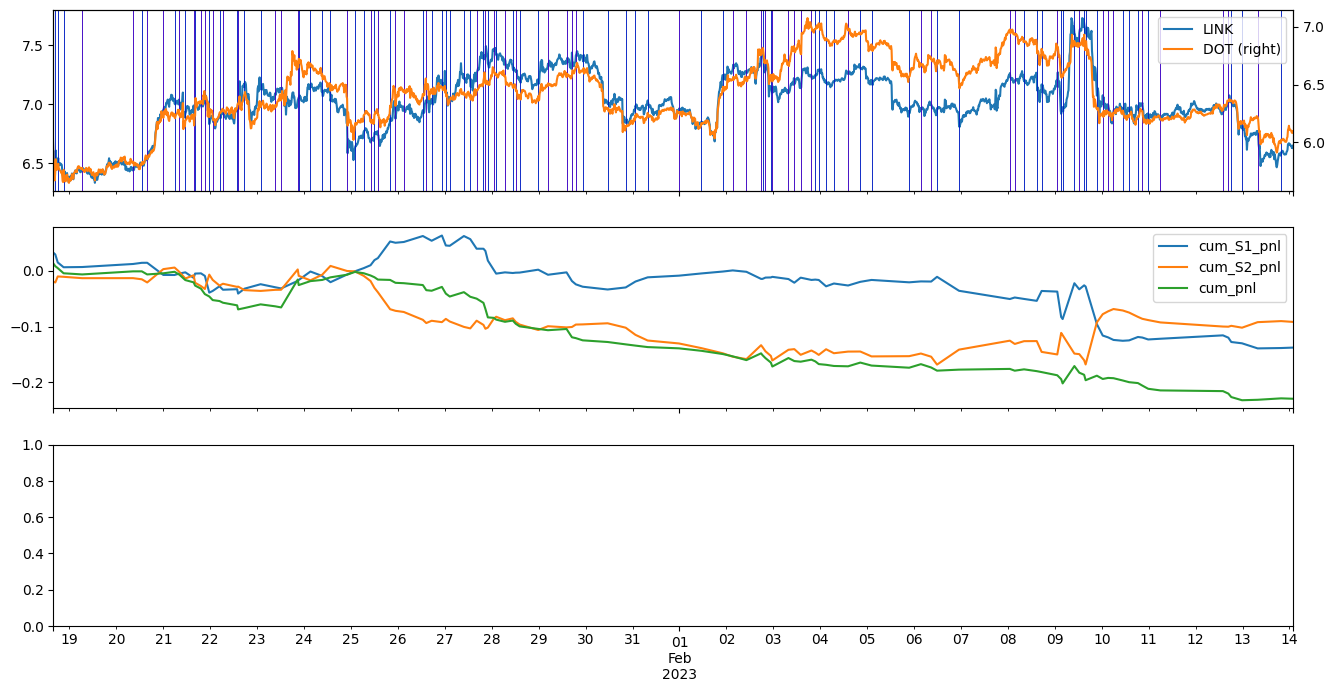

In [251]:

fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(16,8), height_ratios=[1,1,1], sharex=True)
S1.plot(ax=ax1, legend=pair[0])
S2.plot(ax=ax1,  secondary_y=True, legend=pair[1])
for i in df_trades[df_trades.sig_sign == -1].index:
    ax1.axvline(i, c='g', lw=0.5)
for i in df_trades[df_trades.sig_sign == 1].index:
    ax1.axvline(i, c='r', lw=0.5)
for i in df_trades.dtExit.values:
    ax1.axvline(i, c='b', lw=0.5)

df_trades[['cum_S1_pnl', 'cum_S2_pnl', 'cum_pnl']].plot(ax=ax2)
# ax1.plot(S2, secondary_y=True)
# ax1.axhline(zspread.mean(), color='black')
# ax1.axhline(1.0, color='red', linestyle='--')
# ax1.axhline(-1.0, color='green', linestyle='--')
# ax1.legend(['Spread z-score', 'Mean', '+1', '-1']);



In [218]:
df_trades.dtExit.values

array(['2023-05-20T00:00:00.000000000', '2023-05-21T08:00:00.000000000',
       '2023-05-22T01:00:00.000000000', '2023-05-23T14:00:00.000000000',
       '2023-05-25T03:00:00.000000000', '2023-05-25T23:00:00.000000000',
       '2023-05-27T08:00:00.000000000', '2023-05-29T02:00:00.000000000',
       '2023-05-30T03:00:00.000000000', '2023-06-01T07:00:00.000000000',
       '2023-06-02T07:00:00.000000000', '2023-06-03T18:00:00.000000000',
       '2023-06-06T02:00:00.000000000', '2023-06-06T17:00:00.000000000',
       '2023-06-08T22:00:00.000000000', '2023-06-11T13:00:00.000000000',
       '2023-06-15T00:00:00.000000000', '2023-06-18T09:00:00.000000000',
       '2023-06-21T04:00:00.000000000', '2023-06-23T05:00:00.000000000',
       '2023-06-23T19:00:00.000000000', '2023-06-24T08:00:00.000000000',
       '2023-06-24T15:00:00.000000000', '2023-06-25T09:00:00.000000000',
       '2023-06-26T00:00:00.000000000', '2023-06-27T06:00:00.000000000',
       '2023-06-27T10:00:00.000000000', '2023-06-27

In [517]:


# wdf['count_S1'] = wdf['count_S1'].ffill().fillna(0)
trade(wdf)
wdf.to_csv('wdf.csv')
wdf

,S1,S2,lret1,lret2,ratio,rma1,rma2,rstd2,zscore,sig,absZ,zsign,pos,count_S1,count_S1,count_S2,pnl_S1,pnl_S2,pnl
dt,,,,,,,,,,,,,,,,,,,
2022-07-21,0.499341,26.2911,-0.701587,8.343484,0.018993,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0.0,0.0,0.0,NaN,NaN,0.0
2022-07-22,0.482752,24.8968,-0.695141,7.615492,0.019390,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0.0,0.0,0.0,NaN,NaN,0.0
2022-07-23,0.516884,25.5634,-0.709760,7.951936,0.020220,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0.0,0.0,0.0,NaN,NaN,0.0
2022-07-24,0.512030,25.5462,-0.775877,7.881804,0.020043,NaN,NaN,NaN,NaN,0,NaN,0,NaN,0.0,0.0,0.0,NaN,NaN,0.0
2022-07-25,0.475113,23.2592,-0.709789,7.177683,0.020427,0.019815,NaN,NaN,NaN,0,NaN,0,NaN,0.0,0.0,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-01,0.292420,20.8846,-0.234229,6.870501,0.014002,0.014722,0.016363,0.001346,-1.218957,1,1.218957,-1,NaN,0.0,0.0,0.0,NaN,NaN,0.0
2023-07-02,0.291700,20.3683,-0.237239,6.702277,0.014321,0.014519,0.016173,0.001353,-1.222463,1,1.222463,-1,NaN,0.0,0.0,0.0,NaN,NaN,0.0
2023-07-03,0.296380,20.0733,-0.240562,6.660065,0.014765,0.014418,0.016009,0.001313,-1.211977,1,1.211977,-1,NaN,0.0,0.0,0.0,NaN,NaN,0.0


In [507]:
# wdf.loc[:,['count_S1','count_S2']] = wdf[['count_S1','count_S2']].ffill().fillna(0).values
# wdf[~wdf.count_S1.isnull()]
# wdf['count_S1'] = wdf['count_S1'].ffill().fillna(0)

# wdf
pos_start_index = '2022-09-03 00:00:00'
start_row = wdf.loc[pos_start_index]
start_row.S1

0.48037

<Axes: xlabel='dt'>

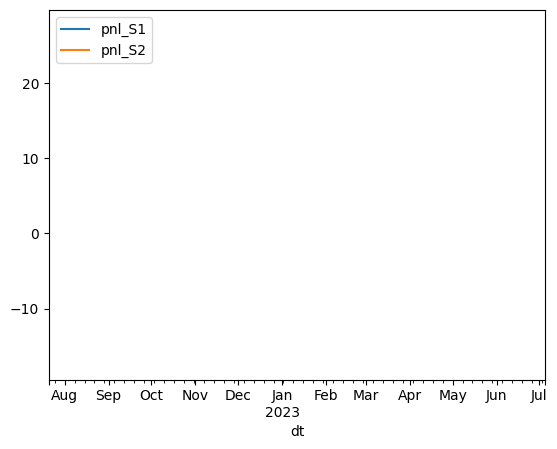

In [541]:
wdf[['pnl_S1','pnl_S2']].cumsum().plot(legend=True)
# wdf[['pnl_S1','pnl_S2']].cumsum().plot()

<Axes: xlabel='dt'>

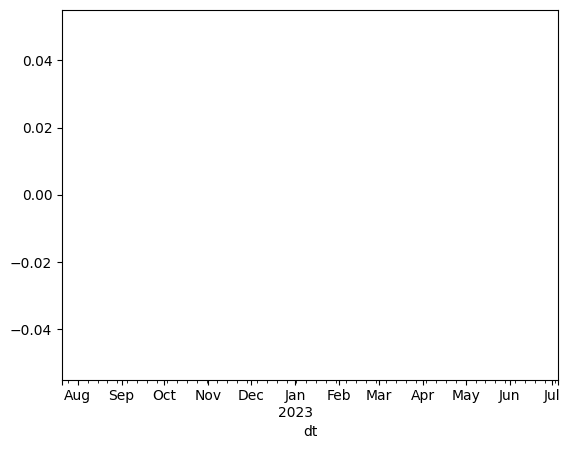

In [513]:
wdf.pnl.plot()

In [540]:
tdf = wdf[~wdf.pnl_S1.isnull()]
tdf.to_csv('trades.csv')
tdf

,S1,S2,lret1,lret2,ratio,rma1,rma2,rstd2,zscore,sig,...,zsign,pos,count_S1,count_S2,pnl_S1,pnl_S2,pnl,cum_pnl,cum_pnl_S1,cum_pnl_S2
dt,,,,,,,,,,,,,,,,,,,,,
2022-09-07,0.478724,37.2387,-0.620730,10.523983,0.012856,0.013857,0.013620,0.000725,0.327442,0,...,1,NaN,0.0,0.0,0.342653,-15.541207,-15.198555,NaN,NaN,NaN
2022-10-03,0.427652,27.4343,-0.492365,8.330196,0.015588,0.015638,0.015171,0.001028,0.453851,0,...,1,NaN,0.0,0.0,2.511905,1.034234,3.546139,NaN,NaN,NaN
2022-10-18,0.362377,23.4069,-0.366879,7.382236,0.015482,0.015795,0.015797,0.000339,-0.005887,0,...,-1,NaN,0.0,0.0,4.938576,1.624813,6.563390,NaN,NaN,NaN
2022-11-07,0.404118,25.0540,-0.443529,7.801288,0.016130,0.016196,0.016054,0.000445,0.318429,0,...,1,NaN,0.0,0.0,-0.721544,-4.237048,-4.958592,NaN,NaN,NaN
2022-11-14,0.332264,20.4703,-0.299687,6.847831,0.016232,0.016543,0.016421,0.000416,0.295170,0,...,1,NaN,0.0,0.0,2.209141,0.149262,2.358403,NaN,NaN,NaN
2022-12-03,0.319582,19.2066,-0.279886,6.428123,0.016639,0.016044,0.016241,0.000516,-0.382970,0,...,-1,NaN,0.0,0.0,1.876014,3.479087,5.355101,NaN,NaN,NaN
2022-12-27,0.260438,15.8534,-0.196275,5.687051,0.016428,0.016067,0.016237,0.000380,-0.446667,0,...,-1,NaN,0.0,0.0,0.379258,3.272177,3.651435,NaN,NaN,NaN
2023-01-11,0.322905,20.5533,-0.285148,6.836571,0.015711,0.015167,0.015471,0.000847,-0.359566,0,...,-1,NaN,0.0,0.0,15.923533,-0.630615,15.292917,NaN,NaN,NaN
2023-02-06,0.382155,22.1242,-0.408399,7.068867,0.017273,0.017275,0.017111,0.000558,0.294428,0,...,1,NaN,0.0,0.0,-6.538593,-4.433818,-10.972412,NaN,NaN,NaN
